# 1102 資料科學分析 Lab6

# 學習目標：groupby、corr、plt

In [1]:
import pandas as pd
import numpy as np
import datetime

# 資料預處理

## 請參考lab5爬取資料

### 請把date的資料型態更改為datetime，closing_price資料型態更改為float64

In [2]:
#參考lab5
# data = pd.read_csv('.\\1102_DS_Lab5\\data_science_data.csv',index_col=0)
data = pd.read_csv('C:\\Users\\TWP\\Desktop\\1102_DS_Lab5\\data_science_data.csv',index_col=0)
#提取資料
data = data[['date','證券名稱','收盤價']]
#更改名字
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})
#清理資料
data['closing_price'] = data['closing_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data = data.dropna()
#更改資料型態
data['closing_price'] = data['closing_price'].astype('float64')
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.head()

,date,name,closing_price
0,2021-01-04,元大台灣50,124.35
1,2021-01-04,元大中型100,44.60
2,2021-01-04,富邦科技,112.10
3,2021-01-04,元大電子,58.50
4,2021-01-04,元大台商50,28.70


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273451 entries, 0 to 1148
Data columns (total 3 columns):
date             273451 non-null datetime64[ns]
name             273451 non-null object
closing_price    273451 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.3+ MB


In [12]:
data.describe()

,closing_price
count,273451.000000
mean,69.487113
std,181.256310
min,0.440000
25%,18.800000
50%,33.150000
75%,63.000000
max,5350.000000


In [13]:
data["name"].describe()

count     273451
unique      1162
top           集盛
freq         244
Name: name, dtype: object

## pd.groupby

對數據進行分組計算  --> Split --> Apply --> Combine

In [15]:
data_group = data.groupby('name')

In [19]:
data_group.first()

,date,closing_price
name,,
ABC-KY,2021-01-04,57.20
AES-KY,2021-03-22,469.00
BP上證50,2021-01-04,125.70
FH富時不動產,2021-01-04,12.64
FH富時高息低波,2021-01-04,49.23
FH彭博新興債,2021-01-04,21.88
FH彭博高收益債,2021-01-04,18.45
FH滬深,2021-01-04,31.71
FH香港反1,2021-01-04,7.44


### get_group 提取資料

In [20]:
data_group.get_group('台積電')

,date,closing_price
424,2021-01-04,536.0
424,2021-01-05,542.0
424,2021-01-06,549.0
424,2021-01-07,565.0
423,2021-01-08,580.0
423,2021-01-11,584.0
423,2021-01-12,591.0
423,2021-01-13,605.0
423,2021-01-14,592.0
423,2021-01-15,601.0


In [1]:
#for (name, group) in data_group:
    #print(name)
    #print(group)

### 以組進行計算總和

In [24]:
data_group.count()

,date,closing_price
name,,
ABC-KY,244,244
AES-KY,197,197
BP上證50,145,145
FH富時不動產,244,244
FH富時高息低波,244,244
FH彭博新興債,244,244
FH彭博高收益債,244,244
FH滬深,244,244
FH香港反1,244,244


### 以組進行計算平均

In [25]:
data_group.sum().head()

,closing_price
name,
ABC-KY,10634.40
AES-KY,186841.50
BP上證50,17730.30
FH富時不動產,3412.60
FH富時高息低波,13860.23


In [26]:
data_group.mean().head()

,closing_price
name,
ABC-KY,43.583607
AES-KY,948.434010
BP上證50,122.277931
FH富時不動產,13.986066
FH富時高息低波,56.804221


In [29]:
data_group.get_group('中信金').mean()

closing_price    22.539139
dtype: float64

In [32]:
data[data['name']=='國泰金'].mean()

closing_price    53.385041
dtype: float64

### 以組進行describe()

In [34]:
data_group.describe().head()

closing_price                                                     \
                 count        mean         std     min       25%      50%   
name                                                                        
ABC-KY           244.0   43.583607    7.278120   30.25   37.8125   45.125   
AES-KY           197.0  948.434010  327.912835  447.00  781.0000  837.000   
BP上證50           145.0  122.277931    5.876066  111.15  117.8000  122.000   
FH富時不動產          244.0   13.986066    0.595214   12.30   13.8300   14.140   
FH富時高息低波         244.0   56.804221    3.768477   47.54   55.0500   57.950   

                              
                75%      max  
name                          
ABC-KY      48.8875    57.40  
AES-KY    1120.0000  1825.00  
BP上證50     126.0500   140.10  
FH富時不動產     14.3700    15.16  
FH富時高息低波    59.0125    64.75

## corr 相關係數

### 0.1 <= |ans| <0.3 相關度:低
### 0.3 <= |ans| <0.5 相關度:中
### 0.5 <= |ans| <1.0 相關度:高

![Correlation Coefficient Formula](corr_coeff1.jpg)

![Correlation Coefficient Examples](corr_coeff2.jpg)

In [22]:
#提出中信金與國泰金資料
data_CH = data[data['name']=='中信金'].reset_index(drop=True)
data_KT = data[data['name']=='國泰金'].reset_index(drop=True)

In [23]:
data_CH

,date,name,closing_price
0,2021-01-04,中信金,19.55
1,2021-01-05,中信金,19.60
2,2021-01-06,中信金,19.55
3,2021-01-07,中信金,19.80
4,2021-01-08,中信金,20.00
5,2021-01-11,中信金,19.95
6,2021-01-12,中信金,19.70
7,2021-01-13,中信金,19.85
8,2021-01-14,中信金,19.85
9,2021-01-15,中信金,19.70


In [24]:
data_CH.count()

date             244
name             244
closing_price    244
dtype: int64

In [25]:
data_KT.head()

,date,name,closing_price
0,2021-01-04,國泰金,42.05
1,2021-01-05,國泰金,42.10
2,2021-01-06,國泰金,41.55
3,2021-01-07,國泰金,41.90
4,2021-01-08,國泰金,42.85


In [26]:
data_KT.count()

date             244
name             244
closing_price    244
dtype: int64

In [40]:
data_CH['closing_price'].corr(data_KT['closing_price']) ## 計算兩支股票的相關係數

0.8989768174421846

In [48]:
data.count()

date             273451
name             273451
closing_price    273451
dtype: int64

In [49]:
data.head()

,date,name,closing_price
0,2021-01-04,元大台灣50,124.35
1,2021-01-04,元大中型100,44.60
2,2021-01-04,富邦科技,112.10
3,2021-01-04,元大電子,58.50
4,2021-01-04,元大台商50,28.70


In [50]:
 data['name'].drop_duplicates().count()

1162

In [51]:
data['name'].drop_duplicates()

0          元大台灣50
1         元大中型100
2            富邦科技
3            元大電子
4          元大台商50
5        元大MSCI金融
6           元大高股息
7            富邦摩台
8           元大寶滬深
9        元大MSCI台灣
10         永豐臺灣加權
11           富邦上証
12         元大上證50
13           FH滬深
14          富邦台50
15         富邦上証+R
16       元大台灣50正2
17       元大台灣50反1
18         富邦上証正2
19         富邦上証反1
20       期元大S&P黃金
21        國泰中國A50
22      國泰中國A50+U
23      元大滬深300正2
24      元大滬深300反1
25         富邦深100
26         富邦日本正2
27         富邦日本反1
28       期元大S&P石油
29         群益深証中小
          ...    
1021        志強-KY
135      永昌中小300N
727            鴻碩
125       中信關鍵半導體
411       IKKA-KY
125       富邦台灣半導體
126       國泰智能電動車
266         堤維西甲特
127         富邦未來車
127      中信小資高價30
615          八方雲集
129      中信綠能及電動車
153      元大特選電動車N
444          海悅甲特
1035          永豐實
130      富邦基因免疫生技
836          宜新實業
892            全訊
643         富邦金丙特
155     元大ESG高股息N
1039         森崴能源
131      國泰基因免疫革命
157      統一智慧電動車N
683          三商家購
1039      

### 計算所有公司與中信金的相關度

In [52]:
#需15秒

#製作一個新的dataframe去接資料
data_CH_corr_company = pd.DataFrame()
#製作所有公司的list，方法 : 將data的name這個columns刪除重複項
companies = data['name'].drop_duplicates()
data_CH_corr_company['company'] = companies
data_CH_corr_company['corr'] = 0

#利用apply遍歷所有公司
def get_corr(x):
    data_company = data[data['name']==x].reset_index(drop=True)
    return data_CH['closing_price'].corr(data_company['closing_price'])   

data_CH_corr_company['corr'] = data_CH_corr_company['company'].apply(get_corr)

C:\Users\TWP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


In [53]:
#排序過後的相關度dataframe
data_CH_corr_company.sort_values('corr',ascending = False)

,company,corr
646,中信金,1.000000
637,兆豐金,0.967105
645,永豐金,0.965537
689,增你強,0.951596
907,合庫金,0.930212
617,聯邦銀,0.929179
634,開發金,0.926964
649,第一金,0.926770
728,大量,0.919665
139,統一MSCI美低波N,0.917068


In [54]:
#絕對值並排續後的相關度dataframe
data_CH_corr_company['corr'] = data_CH_corr_company['corr'].abs()
data_CH_corr_company.sort_values('corr',ascending = False)

,company,corr
646,中信金,1.000000e+00
637,兆豐金,9.671047e-01
645,永豐金,9.655370e-01
689,增你強,9.515961e-01
907,合庫金,9.302124e-01
617,聯邦銀,9.291792e-01
60,期富邦VIX,9.281905e-01
634,開發金,9.269635e-01
649,第一金,9.267705e-01
728,大量,9.196649e-01


# matplotlib.pyplot

In [55]:
import matplotlib.pyplot as plt

In [56]:
#將中信金與國泰金merge起來，請參考lab5
data_CH_KT = pd.merge(data_CH[['date','closing_price']],data_KT[['date','closing_price']],on='date',suffixes=('_CH', '_KT')).set_index('date')

In [57]:
data_CH_KT

,closing_price_CH,closing_price_KT
date,,
2021-01-04,19.55,42.05
2021-01-05,19.60,42.10
2021-01-06,19.55,41.55
2021-01-07,19.80,41.90
2021-01-08,20.00,42.85
2021-01-11,19.95,42.60
2021-01-12,19.70,42.30
2021-01-13,19.85,42.40
2021-01-14,19.85,42.50


## plt.plot

C:\Users\TWP\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


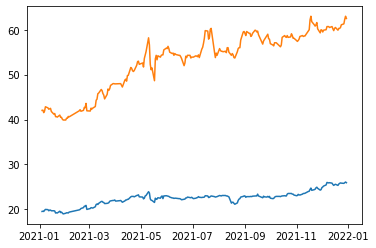

In [58]:
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.show()

### 設定坐標軸與標題名稱

### xlabel、ylabe、title

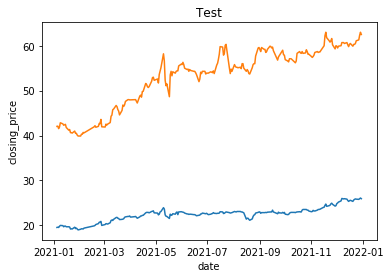

In [59]:
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
#x坐標軸
plt.xlabel("date")
#y坐標軸
plt.ylabel("closing_price")
#標題
plt.title("Test")
plt.show()

### 設定大小

### figure(figsize(x,y))

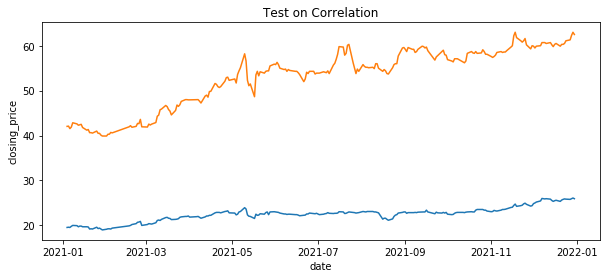

In [61]:
#設定大小
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.xlabel("date")
plt.ylabel("closing_price")
plt.title("Test on Correlation")
plt.show()

### 設定坐標軸刻度

### xticks、yticks

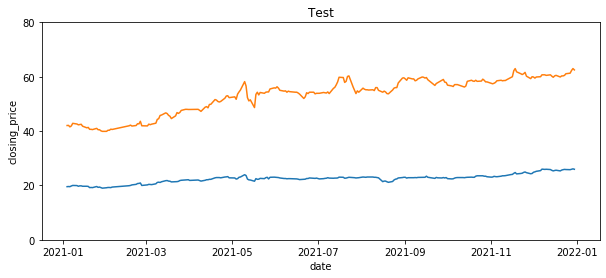

In [62]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
#設定刻度
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("date")
plt.ylabel("closing_price")
plt.title("Test")
plt.show()

### 設定圖例

### legend()

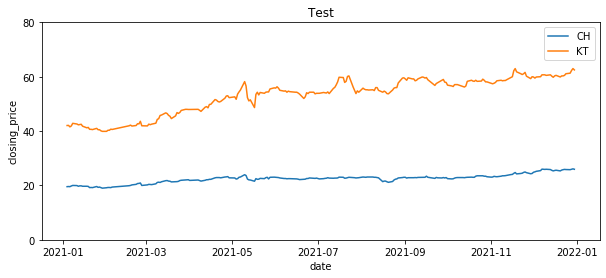

In [63]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.legend(loc='best')
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("date")
plt.ylabel("closing_price")
plt.title("Test")
plt.show()

### 設定顏色

### color

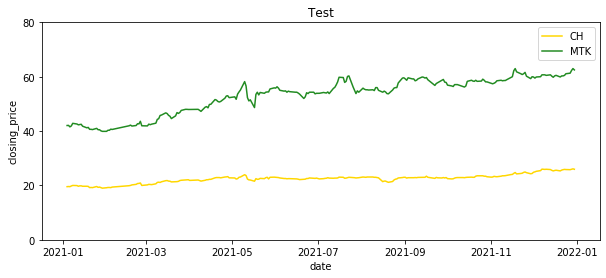

In [64]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH',color='gold')
plt.plot(data_CH_KT['closing_price_KT'],label='MTK',color='forestgreen')
plt.legend(loc='best')
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("date")
plt.ylabel("closing_price")
plt.title("Test")
plt.show()

## 作業三 (due 4/29/2022)


## 1. 請計算　台積電、聯發科和聯電　2021年的股價平均值? 畫出這三支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))

## 2. 請分析2021/1/1-2021/12/31期間與台積電絕對值相關度排行第10名的股票是哪一支股票？